In [140]:
import pandas as pd
import numpy as np

In [141]:
df=pd.read_csv("spam.csv",encoding="latin-1")

In [142]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [143]:
df.shape

(5572, 5)

In [55]:
#1.Data Cleaning
#2.EDA
#3.Text Preprocessing
#4.Model Building
#5.evaluation
#6.Improvement
#7.Website
#8.Deploy

## 1.DATA CLEANING

In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [145]:
#drop last 3 cols
df.drop(columns=["Unnamed: 2","Unnamed: 3","Unnamed: 4"],inplace=True)

In [146]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [147]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [148]:
#rename the cols
df.rename(columns={"v1":"target","v2":"text"},inplace=True)

In [149]:
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [150]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [151]:
df["target"]=encoder.fit_transform(df["target"])

In [152]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [153]:
#missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [154]:
#check for duplicated values
df.duplicated().sum()

np.int64(403)

In [155]:
#remove duplicates
df.drop_duplicates(inplace=True)

In [68]:
df.duplicated().sum()

np.int64(0)

In [69]:
df.shape

(5169, 2)

## 2.EDA

In [70]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [71]:
df["target"].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x18500152120>,
 [Text(-1.014499732282844, 0.4251944181172162, 'ham'),
  Text(1.0144998708287172, -0.42519408755122207, 'spam')],
 [Text(-0.5533634903360967, 0.2319242280639361, '87.37'),
  Text(0.553363565906573, -0.231924047755212, '12.63')])

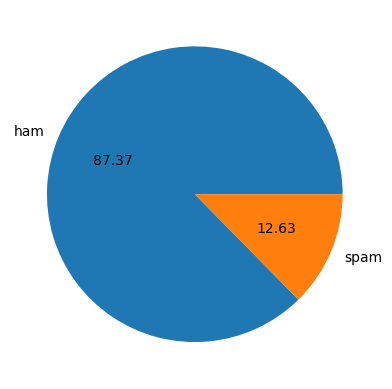

In [72]:
import matplotlib.pyplot as plt
plt.pie(df["target"].value_counts(),labels=["ham","spam"],autopct="%0.2f")

In [73]:
#Data is imbalanced

In [74]:
import nltk 

In [75]:
!pip install nltk

In [76]:
nltk.download("punkt")#punkt-we use this split into the sentence.

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [77]:
df["num_characters"]=df["text"].apply(len)

In [78]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [79]:
#num of words
df["num_words"]=df["text"].apply(lambda x:len(nltk.word_tokenize(x)))

In [80]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [81]:
df.columns

Index(['target', 'text', 'num_characters', 'num_words'], dtype='object')

In [82]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [83]:
df["num_sentences"]=df["text"].apply(lambda x:len(nltk.sent_tokenize(x)))

In [84]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [85]:
df[['num_characters','num_words','num_sentences']].describe()


,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [86]:
#ham
df[df["target"]==0][['num_characters','num_words','num_sentences']].describe()


,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [87]:
#spam
df[df["target"]==1][['num_characters','num_words','num_sentences']].describe()


,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [88]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

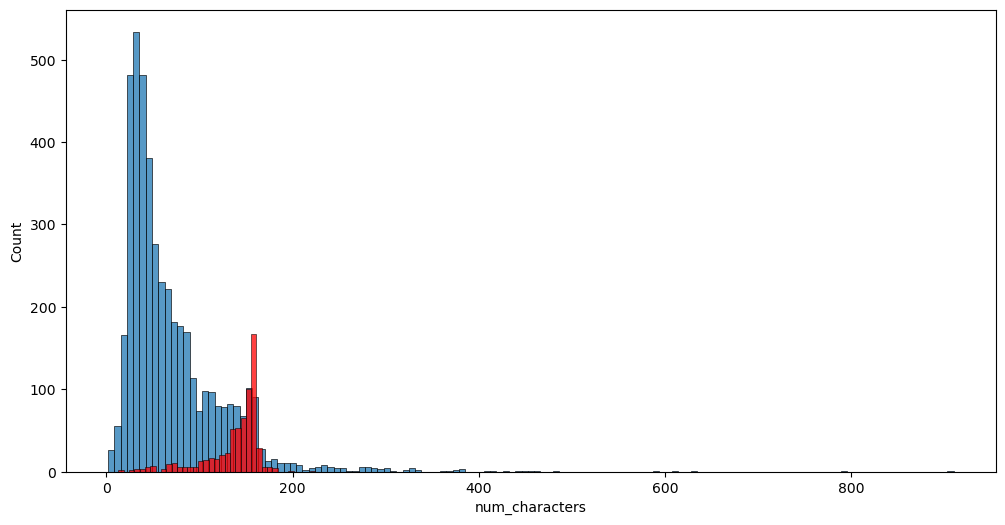

In [89]:
plt.figure(figsize=(12,6))
sns.histplot(df[df["target"]==0]["num_characters"])
sns.histplot(df[df["target"]==1]["num_characters"],color="red")

<Axes: xlabel='num_words', ylabel='Count'>

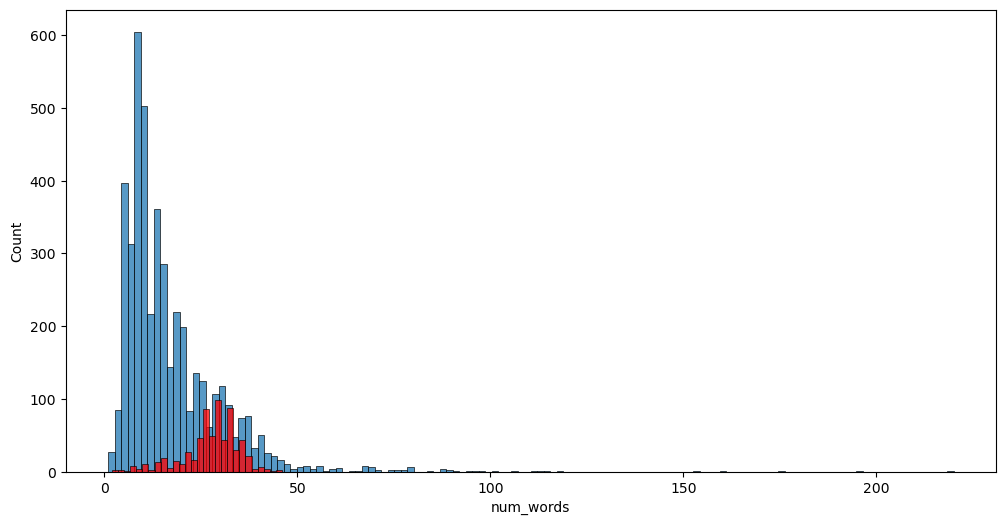

In [90]:
plt.figure(figsize=(12,6))
sns.histplot(df[df["target"]==0]["num_words"])
sns.histplot(df[df["target"]==1]["num_words"],color="red")

<Axes: xlabel='num_sentences', ylabel='Count'>

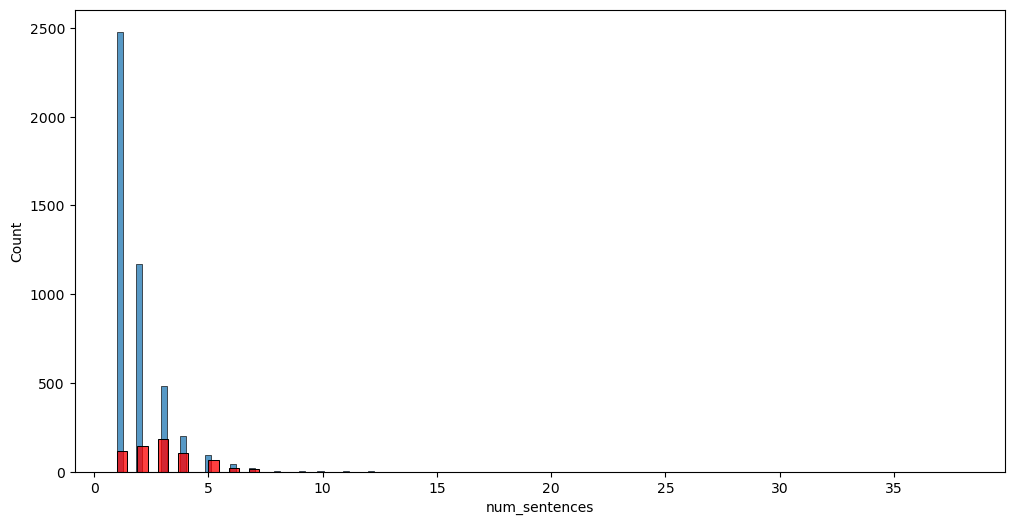

In [91]:
plt.figure(figsize=(12,6))
sns.histplot(df[df["target"]==0]["num_sentences"])
sns.histplot(df[df["target"]==1]["num_sentences"],color="red")


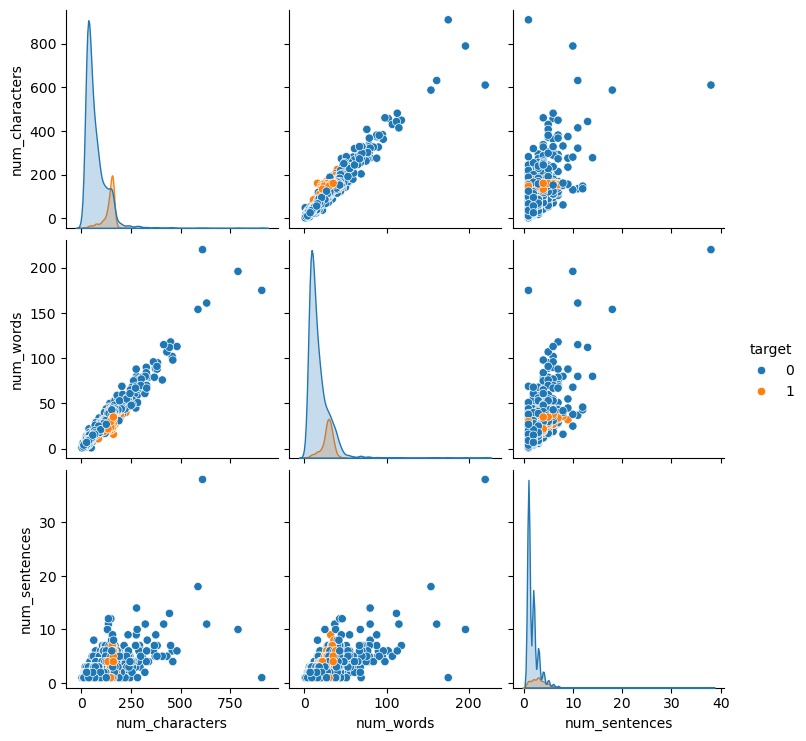

In [92]:
sns.pairplot(df,hue="target")

<Axes: >

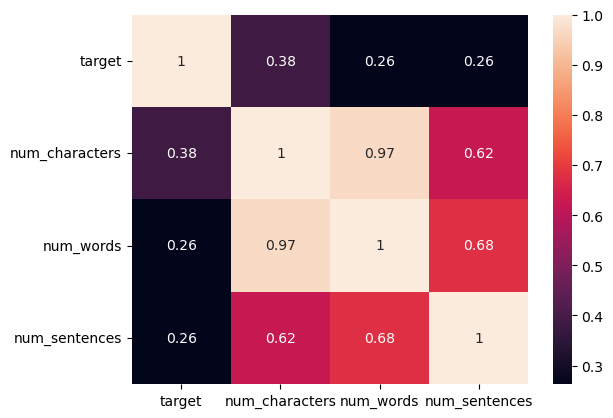

In [93]:
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True)

## 3.DATA PREPROCESSING
   Lower case,
   Tokenization,
   Removing Special Charecters,
   Removing stop words and punctuation 
   stemming

In [156]:
#lowercase
def transform_text(text):
    text=text.lower()
    return text

In [157]:
transform_text("Hi How Are You")

'hi how are you'

In [158]:
#Tockenzation
def transform_text(text):
    text=text.lower()
    text=nltk.word_tokenize(text)
    return text

In [159]:
transform_text("Hi How Are You")

['hi', 'how', 'are', 'you']

In [161]:
df["text"][2000]

"But i'll b going 2 sch on mon. My sis need 2 take smth."

In [162]:
#removing spl charecters
def transform_text(text):
    text=text.lower()
    text=nltk.word_tokenize(text)
  
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
    return y

In [163]:
transform_text("Hi How Are You %% @ eg")

['hi', 'how', 'are', 'you', 'eg']

In [164]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [165]:
#removing stopwords
from nltk.corpus import stopwords
stopwords.words("english")

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [166]:
def transform_text(text):
    text=text.lower()
    text=nltk.word_tokenize(text)
  
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
    text =y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    return y

In [167]:
import string

In [168]:
transform_text("Hi How Are You Rose?")

['hi', 'rose']

In [169]:
#stemming
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
ps.stem('dancing')

'danc'

In [170]:
def transform_text(text):
    text=text.lower()
    text=nltk.word_tokenize(text)
  
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
    text =y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text =y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))

    return " ".join(y)

In [171]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [172]:
df["text"][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [173]:
df["transformed_text"]=df["text"].apply(transform_text)

In [174]:
df.head()

,target,text,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",nah think goe usf live around though


In [175]:
!pip install wordcloud

In [176]:
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color="white")

In [177]:
spam_wc=wc.generate(df[df["target"]==1]["transformed_text"].str.cat(sep=""))

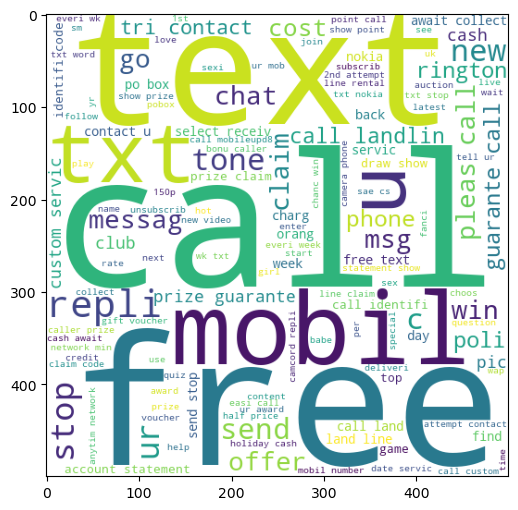

In [178]:
plt.figure(figsize=(12,6))
plt.imshow(spam_wc)

In [179]:
ham_wc=wc.generate(df[df["target"]==0]["transformed_text"].str.cat(sep=""))

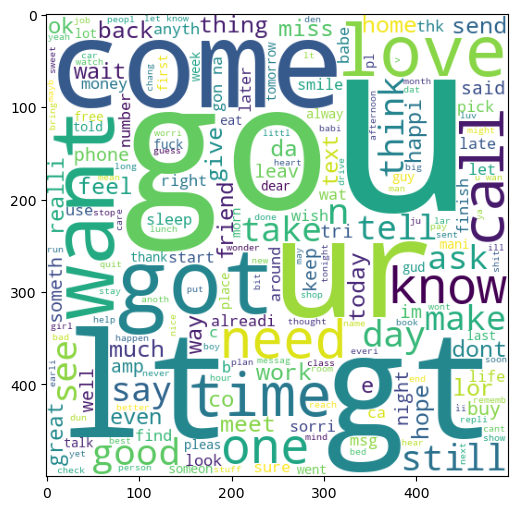

In [181]:
plt.figure(figsize=(12,6))
plt.imshow(ham_wc)

In [182]:
df.head()

,target,text,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",nah think goe usf live around though


In [119]:
spam_corpus=[]
for msg in df[df["target"]==1]["transformed_text"].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [120]:
len(spam_corpus)

9939

In [121]:
import matplotlib.pyplot as plt
from collections import Counter

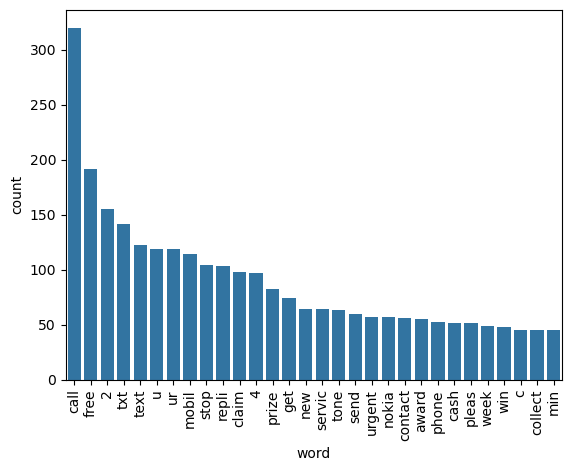

In [122]:
df = pd.DataFrame(Counter(spam_corpus).most_common(30),
                  columns=["word", "count"])

# plot
sns.barplot(x="word", y="count", data=df)
plt.xticks(rotation=90)
plt.show()

In [123]:
import pandas as pd
df = pd.read_csv("spam.csv", encoding="latin-1")
df.rename(columns={'v1': 'target', 'v2': 'text'}, inplace=True)

In [124]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [125]:
df["target"]=encoder.fit_transform(df["target"])

In [126]:
df["transformed_text"]=df["text"].apply(transform_text)

In [127]:
ham_corpus = []

for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [128]:
len(ham_corpus)

38221

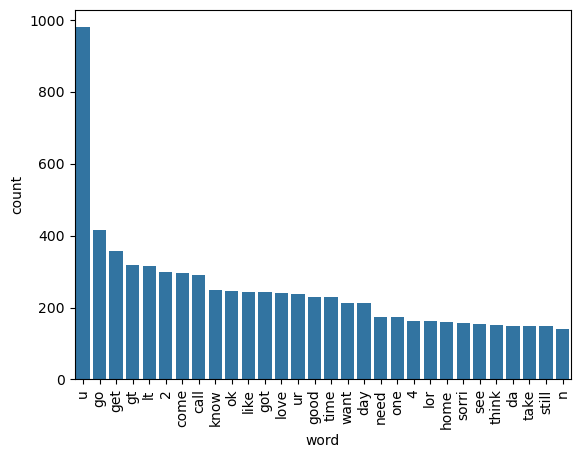

In [129]:
df = pd.DataFrame(Counter(ham_corpus).most_common(30),
                  columns=["word", "count"])

# plot
sns.barplot(x="word", y="count", data=df)
plt.xticks(rotation=90)
plt.show()

In [130]:
#Text vectorization
#using Bag of words
df.head()

,word,count
0,u,979
1,go,417
2,get,357
3,gt,318
4,lt,316


## 4.MODEL BUILDING

In [183]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()

In [184]:
X=cv.fit_transform(df["transformed_text"]).toarray()

In [185]:
X.shape

(5169, 6708)

In [186]:
y=df["target"].values

In [187]:
y

array([0, 0, 1, ..., 0, 0, 0], shape=(5169,))

In [188]:
from sklearn.model_selection import train_test_split

In [189]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [190]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [191]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [192]:
gnb.fit(X_train,y_train)
y_pred1=gnb.predict(X_test)
print("GaussianNB")
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

GaussianNB
0.8800773694390716
[[792 104]
 [ 20 118]]
0.5315315315315315


In [193]:
mnb.fit(X_train,y_train)
y_pred2=mnb.predict(X_test)
print("\nMultinomialNB")
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))


MultinomialNB
0.9642166344294004
[[871  25]
 [ 12 126]]
0.8344370860927153


In [194]:
bnb.fit(X_train,y_train)
y_pred3=bnb.predict(X_test)
print("\nBernoulliNB")
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))


BernoulliNB
0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


In [195]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.tree import DecisionTreeClassifier

In [196]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [197]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import (
    RandomForestClassifier,
    AdaBoostClassifier,
    BaggingClassifier,
    ExtraTreesClassifier,
    GradientBoostingClassifier
)
from xgboost import XGBClassifier

In [198]:
svc=SVC(kernel="sigmoid",gamma=1.0)
knc=KNeighborsClassifier()
mnb=MultinomialNB()
dtc=DecisionTreeClassifier(max_depth=5)
lrc=LogisticRegression(solver="liblinear",penalty='l1')
rfc=RandomForestClassifier(n_estimators=50,random_state=2)
abc=AdaBoostClassifier(n_estimators=50,random_state=2)
bc=BaggingClassifier(n_estimators=50,random_state=2)
etc=ExtraTreesClassifier(n_estimators=50,random_state=2)
gbdt=GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb=XGBClassifier(n_estimators=50,random_state=2)

In [199]:
clfs={
    "SVC":svc,
    "KN":knc,
    "NB":mnb,
    "DT":dtc,
    "LR":lrc,
    "RF":rfc,
    "AdaBoost":abc,
    "BgC":bc,
    "ETC":etc,
    "GBDT":gbdt,
    "xgb":xgb
}

In [200]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_test)
    accuracy=accuracy_score(y_test,y_pred)
    precision=precision_score(y_test,y_pred)
    return accuracy,precision

In [201]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9264990328820116, 0.7421875)

In [202]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9264990328820116
Precision -  0.7421875
For  KN
Accuracy -  0.9061895551257253
Precision -  1.0
For  NB
Accuracy -  0.9642166344294004
Precision -  0.8344370860927153
For  DT
Accuracy -  0.9264990328820116
Precision -  0.9428571428571428
For  LR
Accuracy -  0.9709864603481625
Precision -  0.9736842105263158
For  RF
Accuracy -  0.971953578336557
Precision -  1.0
For  AdaBoost
Accuracy -  0.9197292069632496
Precision -  0.9365079365079365
For  BgC
Accuracy -  0.9622823984526112
Precision -  0.9159663865546218
For  ETC
Accuracy -  0.97678916827853
Precision -  0.9913793103448276
For  GBDT
Accuracy -  0.9439071566731141
Precision -  0.9444444444444444
For  xgb
Accuracy -  0.9738878143133463
Precision -  0.9743589743589743


In [203]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [204]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.906190,1.000000
5,RF,0.971954,1.000000
8,ETC,0.976789,0.991379
10,xgb,0.973888,0.974359
4,LR,0.970986,0.973684
9,GBDT,0.943907,0.944444
3,DT,0.926499,0.942857
6,AdaBoost,0.919729,0.936508
7,BgC,0.962282,0.915966
2,NB,0.964217,0.834437


In [205]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [206]:
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.906190
1,RF,Accuracy,0.971954
2,ETC,Accuracy,0.976789
3,xgb,Accuracy,0.973888
4,LR,Accuracy,0.970986
5,GBDT,Accuracy,0.943907
6,DT,Accuracy,0.926499
7,AdaBoost,Accuracy,0.919729
8,BgC,Accuracy,0.962282
9,NB,Accuracy,0.964217


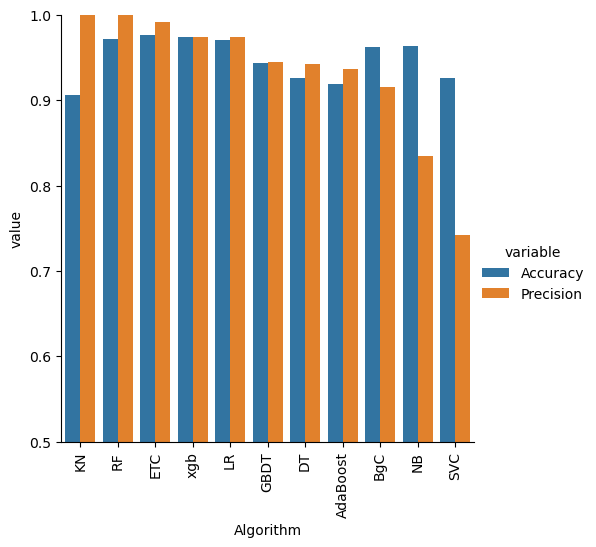

In [207]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
# model improve
# 1. Change the max_features parameter of TfIdf

In [208]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [209]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)

In [210]:
new_df = performance_df.merge(temp_df,on='Algorithm')

In [211]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [212]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)

In [213]:
new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_num_chars,Precision_num_chars
0,KN,0.906190,1.000000,0.906190,1.000000,0.906190,1.000000,0.906190,1.000000
1,RF,0.971954,1.000000,0.971954,1.000000,0.971954,1.000000,0.971954,1.000000
2,ETC,0.976789,0.991379,0.976789,0.991379,0.976789,0.991379,0.976789,0.991379
3,xgb,0.973888,0.974359,0.973888,0.974359,0.973888,0.974359,0.973888,0.974359
4,LR,0.970986,0.973684,0.970986,0.973684,0.970986,0.973684,0.970986,0.973684
5,GBDT,0.943907,0.944444,0.943907,0.944444,0.943907,0.944444,0.943907,0.944444
6,DT,0.926499,0.942857,0.926499,0.942857,0.926499,0.942857,0.926499,0.942857
7,AdaBoost,0.919729,0.936508,0.919729,0.936508,0.919729,0.936508,0.919729,0.936508
8,BgC,0.962282,0.915966,0.962282,0.915966,0.962282,0.915966,0.962282,0.915966
9,NB,0.964217,0.834437,0.964217,0.834437,0.964217,0.834437,0.964217,0.834437


In [219]:
from sklearn.ensemble import VotingClassifier

voting = VotingClassifier(
    estimators=[
        ('svc', svc),
        ('mnb', mnb),
        ('etc', etc)
    ],
    voting='soft'
)

In [220]:
voting.fit(X_train,y_train)

,estimators,"[('svc', ...), ('mnb', ...), ...]"
,voting,'soft'
,weights,None
,n_jobs,None
,flatten_transform,True
,verbose,False
,C,1.0
,kernel,'sigmoid'
,degree,3
,gamma,1.0
,coef0,0.0


In [221]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9816247582205029
Precision 0.976


In [222]:
# Applying stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [227]:
from sklearn.ensemble import StackingClassifier

In [228]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [229]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9845261121856866
Precision 0.9765625


In [231]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()

In [232]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))